# Uniaxial Plasticity Models

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, linspace, pi

from opensees.units.english import ksi, psi, inch, ft

# plt.style.use("berkeley")

## Define Parameters

In [15]:
Fy  = 66.8*ksi     # steel yield stress
Es  = 29000.*ksi   # modulus of steel
Bs  = 0.005        # strain-hardening ratio 
R0  = 18           # control the transition from elastic to plastic branches
cR1 = 0.925        # control the transition from elastic to plastic branches
cR2 = 0.15         # control the transition from elastic to plastic branches

## Perform Analysis

In [20]:
from opensees import uniaxial

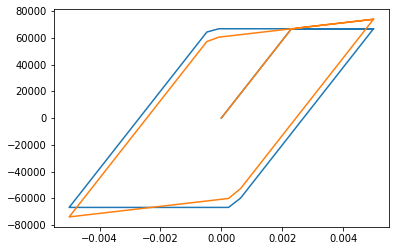

In [19]:
fig, ax = plt.subplots()

strain = 0.005*sin(linspace(0, 2.5*pi, 100))

with uniaxial.ElasticPP(1, Es, Fy/Es) as mat:
    stress = [mat.getStress(e, commit=True) for e in strain]
    ax.plot(strain, stress, label="ElasticPP")

with uniaxial.Hardening(1, Es, Fy, 0.0*Es, 0.1*Es) as mat:
    ax.plot(strain, [mat.getStress(e, commit=True) for e in strain], label="Hardening")
